In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
phi = np.abs(np.random.normal(0.25,0.05,70000))
swc = np.abs(np.random.normal(0.1,0.01,70000))

k = 8.58102 *(phi**(4.4))/(swc**2)

In [6]:
df= pd.DataFrame({'Porosity':phi,'Swc':swc,'Permeability (D)':k})

In [7]:
df.head()

,Porosity,Swc,Permeability (D)
0,0.260869,0.106801,2.035378
1,0.182443,0.110673,0.393021
2,0.217169,0.104931,0.941115
3,0.210811,0.095109,1.005153
4,0.234040,0.090664,1.752031


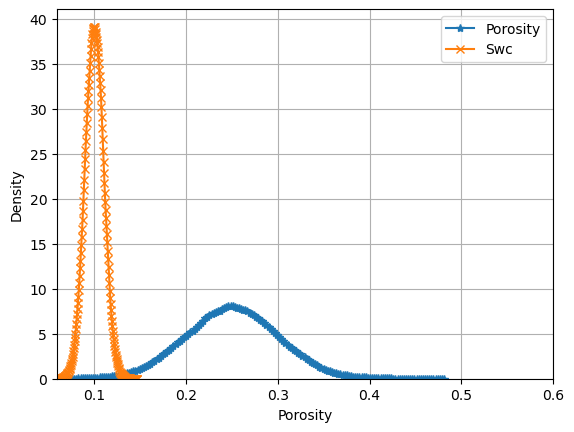

In [8]:
plt.style.use('default')

sns.kdeplot(df['Porosity'], label='Porosity', marker='*')
sns.kdeplot(df['Swc'], label='Swc', marker='x')

plt.xlim(min(swc),0.6)
plt.grid()
plt.legend(loc='best')
plt.show()


### Build Machine Learning model to predict Permeability

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [10]:
# Split the dataset into feature and target set
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [11]:
X.head()

,Porosity,Swc
0,0.260869,0.106801
1,0.182443,0.110673
2,0.217169,0.104931
3,0.210811,0.095109
4,0.234040,0.090664



Y.head()

#### Split the data into train and test

In [13]:
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [14]:
x_train.shape, y_train.shape

((52500, 2), (52500,))

In [15]:
x_test.shape, y_test.shape

((17500, 2), (17500,))

### 1. LinearRegression model

In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
l_y_pred = lr.predict(x_test)

In [19]:
print(lr.score(x_test,l_y_pred))

1.0


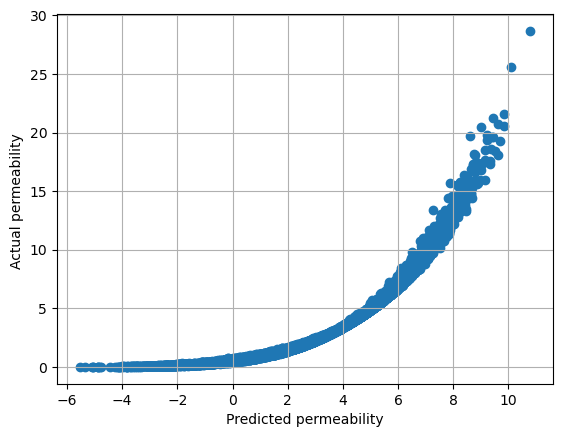

In [23]:
plt.style.use('default')
plt.scatter(l_y_pred,y_test)
plt.ylabel('Actual permeability ')
plt.xlabel('Predicted permeability')
plt.grid()


### 2. DecisionTreeRegressor

In [24]:
dtree = DecisionTreeRegressor(random_state=1)

In [25]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [27]:
d_y_pred = dtree.predict(x_test)

In [30]:
score = dtree.score(x_test,y_test)

In [31]:
print(score*100)

99.83475145346652


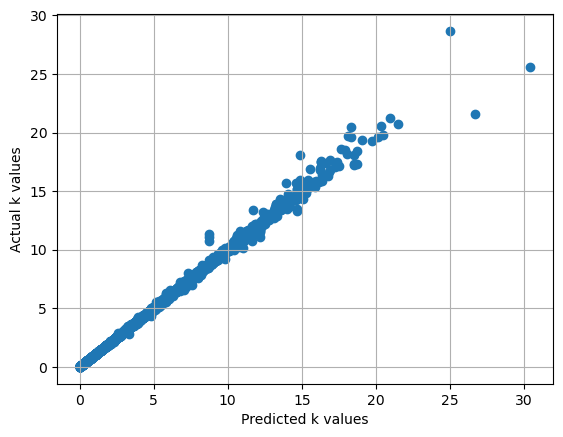

In [32]:
plt.scatter(d_y_pred,y_test)
plt.xlabel('Predicted k values')
plt.ylabel('Actual k values')

plt.grid()
plt.style.use('default')

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
def get_mae(nodes,x_test,y_test,x_train,y_train):
    dt = DecisionTreeRegressor(max_leaf_nodes=nodes)
    dt.fit(x_train, y_train)
    y_p = df.predict(x_test)
    
    mae = mean_absolute_error(y_test,y_p)
    
    return mae